In [95]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torch.utils.data import Dataset, DataLoader
import os 
from warnings import simplefilter

In [96]:
import models
import class_sampling
import train
import metric_utils

In [101]:
NUM_CLASSES = 10
NUM_CLASSES_REDUCED = 2
n_epochs = 20
batch_size_train = 64
batch_size_test = 1000
momentum = 0.5

ratio = (100, 1)

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

nums = (6, 8)

DIRECTORY = f"results/learning_rate_results_{str(nums[0])}{str(nums[1])}"
RATIO_STR = str(ratio[0])


simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)
simplefilter(action='ignore', category=DeprecationWarning)

In [102]:
train_mnist = torchvision.datasets.MNIST('mnist', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor() ]))
                             


test_mnist = torchvision.datasets.MNIST('mnist', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor() ]))
                

reduced_train_mnist = class_sampling.Reduce(train_mnist, NUM_CLASSES_REDUCED, nums=nums)
reduced_test_mnist = class_sampling.Reduce(test_mnist, NUM_CLASSES_REDUCED, nums=nums)


reduced_train_mnist_ratio = class_sampling.BinaryRatio(train_mnist, 2, ratio, nums=nums)

In [103]:
train_loader_reduced = DataLoader(reduced_train_mnist, batch_size=batch_size_train, shuffle=False) 
train_loader_reduced_ratio = DataLoader(reduced_train_mnist_ratio, batch_size=batch_size_train, shuffle=False)
train_loader_normal = DataLoader(train_mnist, batch_size=batch_size_train, shuffle=False)

test_loader_reduced = DataLoader(reduced_test_mnist, batch_size=batch_size_test, shuffle=False) 
test_loader_normal = DataLoader(test_mnist, batch_size=batch_size_test, shuffle=False)


Test set: Avg. loss: 0.018764169073006133, AUC: 0.4259660355034659


Test set: Avg. loss: 3431872.132505176, AUC: 0.5


Test set: Avg. loss: 78211.24844720497, AUC: 0.9637399098909861


Test set: Avg. loss: 61817.634575569355, AUC: 0.969934368743918


Test set: Avg. loss: 108046.34782608696, AUC: 0.9557921405391965


Test set: Avg. loss: 113534.69979296066, AUC: 0.9522072850265568


Test set: Avg. loss: 114362.18219461698, AUC: 0.9516939380039696


Test set: Avg. loss: 103252.29606625259, AUC: 0.9552873671620805


Test set: Avg. loss: 124777.50724637682, AUC: 0.9491443501819756


Test set: Avg. loss: 86814.78260869565, AUC: 0.957854102275017


Test set: Avg. loss: 80079.43271221532, AUC: 0.9609256107650691


Test set: Avg. loss: 135853.44513457557, AUC: 0.9440194536015741


Test set: Avg. loss: 131130.47204968944, AUC: 0.9460728416919232


Test set: Avg. loss: 126744.00414078675, AUC: 0.9476128827596851


Test set: Avg. loss: 101519.87577639752, AUC: 0.9547911674304357


Test set: Avg


Test set: Avg. loss: 94071.88819875776, AUC: 0.9674619437311648


Test set: Avg. loss: 171779.55693581782, AUC: 0.9506758176042662


Test set: Avg. loss: 179532.60869565216, AUC: 0.9476043091142139


Test set: Avg. loss: 90419.24844720497, AUC: 0.9660247864090571


Test set: Avg. loss: 178083.44099378883, AUC: 0.9460642680464522


Test set: Avg. loss: 174481.6480331263, AUC: 0.9440108799561029


Test set: Avg. loss: 162623.39544513458, AUC: 0.9465776150690393


Test set: Avg. loss: 137312.90683229815, AUC: 0.9522244323174993


Test set: Avg. loss: 165335.49896480332, AUC: 0.9445242269786902


Test set: Avg. loss: 184853.00207039338, AUC: 0.9393907567528175


Test set: Avg. loss: 171068.45548654243, AUC: 0.941957491865754


Test set: Avg. loss: 164066.13664596275, AUC: 0.9450375740012775


Test set: Avg. loss: 152444.68322981367, AUC: 0.9501710442271502


Test set: Avg. loss: 137178.57971014493, AUC: 0.951711085294912


Test set: Avg. loss: 181307.4244306418, AUC: 0.9399126774208759




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 110900.58799171842, AUC: 0.9522330059629704


Test set: Avg. loss: 112784.41407867495, AUC: 0.9522330059629704


Test set: Avg. loss: 142488.93995859212, AUC: 0.9404260244434632



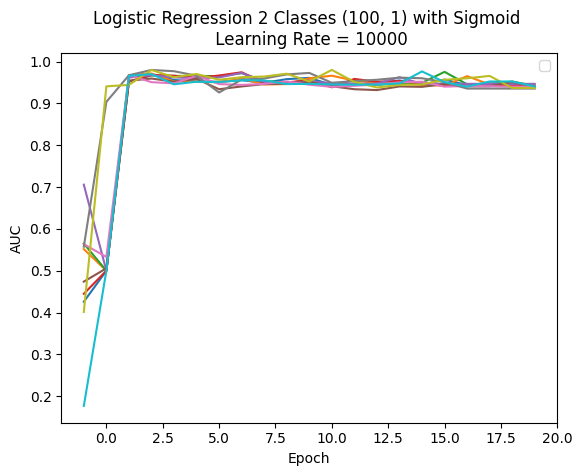

In [104]:
# SIGMOID 2 CLASS RATIO 
# the AUC isn't saving? 

momentum=0
learning_rates = [10000]

for learning_rate in learning_rates:
    aucs = []
    for i in range(10):
        model_aucs = []
        network = models.SigmoidLogisticRegression(NUM_CLASSES_REDUCED)
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network) 
        model_aucs.append(auc)
        for epoch in range(n_epochs):
            directory = f"{DIRECTORY}/sigmoid/{str(learning_rate)}/ratio{i}_{RATIO_STR}/model{epoch}"
           #_, _ = train.train_sigmoid(epoch, train_loader_reduced_ratio, network, optimizer, verbose=False, directory=directory)
            _, _ = train.train_sigmoid(epoch, train_loader_reduced_ratio, network, optimizer, verbose=False)
            _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network)
            model_aucs.append(auc)
        aucs.append(model_aucs)
        plt.plot(np.arange(-1, n_epochs), aucs[i])
   # np.save(f'{DIRECTORY}/sigmoid/{str(learning_rate)}/ratio{i}_{RATIO_STR}/aucs', aucs)
    plt.title("Logistic Regression 2 Classes " + str(ratio) + " with Sigmoid \n Learning Rate = " + str(learning_rate))
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()
   


Test set: Avg. loss: 0.010619169825921386, AUC: 0.7145172165782613


Test set: Avg. loss: 1.2553008095310654, AUC: 0.9862244897959184


Test set: Avg. loss: 0.0544054721264129, AUC: 0.9977276813809224


Test set: Avg. loss: 0.05757454946531471, AUC: 0.9972871527465612


Test set: Avg. loss: 0.06860961192606753, AUC: 0.9972871527465612


Test set: Avg. loss: 0.05337723535848848, AUC: 0.9977973568281938


Test set: Avg. loss: 0.060264857948249116, AUC: 0.9977973568281938


Test set: Avg. loss: 0.06124515939266124, AUC: 0.9977973568281938


Test set: Avg. loss: 0.061795191843740764, AUC: 0.9977973568281938


Test set: Avg. loss: 0.06117850770341589, AUC: 0.9977973568281938


Test set: Avg. loss: 0.06117850770341589, AUC: 0.9977973568281938


Test set: Avg. loss: 0.06117850770341589, AUC: 0.9977973568281938


Test set: Avg. loss: 0.06117850770341589, AUC: 0.9977973568281938


Test set: Avg. loss: 0.06117850770341589, AUC: 0.9977973568281938


Test set: Avg. loss: 0.06117850770341589, AUC:


Test set: Avg. loss: 0.05396466807552545, AUC: 0.9982378854625551


Test set: Avg. loss: 0.05396466807552545, AUC: 0.9982378854625551


Test set: Avg. loss: 0.011936660072200405, AUC: 0.6472489436303155


Test set: Avg. loss: 24.719636755688533, AUC: 0.9096938775510204


Test set: Avg. loss: 0.09695778343976248, AUC: 0.9981682100152836


Test set: Avg. loss: 0.08567639349763839, AUC: 0.9982378854625551


Test set: Avg. loss: 0.14650170075977947, AUC: 0.9969162995594714


Test set: Avg. loss: 0.23034190365045065, AUC: 0.9969162995594714


Test set: Avg. loss: 0.24988784970403, AUC: 0.9969162995594714


Test set: Avg. loss: 0.20278685369108304, AUC: 0.9969162995594714


Test set: Avg. loss: 0.2276745302457336, AUC: 0.9969162995594714


Test set: Avg. loss: 0.2274046985815603, AUC: 0.9964757709251102


Test set: Avg. loss: 0.19734095219461067, AUC: 0.9964757709251102


Test set: Avg. loss: 0.19813019592429448, AUC: 0.9964757709251102


Test set: Avg. loss: 0.18163813597767065, AUC: 0.997

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.38336885781434693, AUC: 0.9969162995594714


Test set: Avg. loss: 0.38336885781434693, AUC: 0.9969162995594714



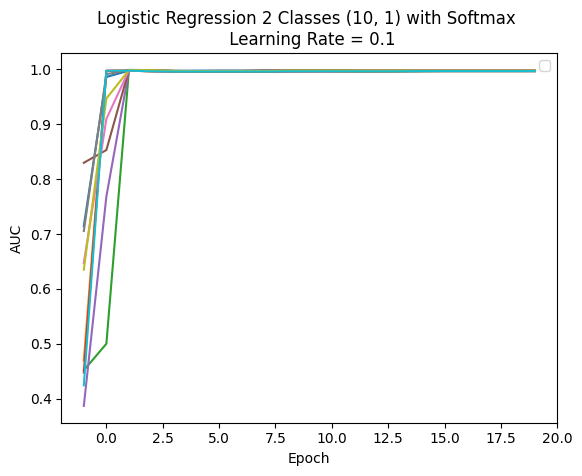


Test set: Avg. loss: 0.020446160949995615, AUC: 0.6975231502292547


Test set: Avg. loss: 0.4103910946676917, AUC: 0.9887755102040816


Test set: Avg. loss: 0.006214857439622811, AUC: 0.9981682100152836


Test set: Avg. loss: 0.005837507507197964, AUC: 0.9982378854625551


Test set: Avg. loss: 0.011685109871217264, AUC: 0.9969162995594714


Test set: Avg. loss: 0.020069125921731865, AUC: 0.9969162995594714


Test set: Avg. loss: 0.018778786084330673, AUC: 0.9969162995594714


Test set: Avg. loss: 0.01862836256094858, AUC: 0.9969162995594714


Test set: Avg. loss: 0.01880583075485049, AUC: 0.9964757709251102


Test set: Avg. loss: 0.015799447097958684, AUC: 0.9964757709251102


Test set: Avg. loss: 0.016360336556220448, AUC: 0.9969162995594714


Test set: Avg. loss: 0.012629429161125886, AUC: 0.9977973568281938


Test set: Avg. loss: 0.013915335202048011, AUC: 0.9977973568281938


Test set: Avg. loss: 0.01698755485228049, AUC: 0.9977973568281938


Test set: Avg. loss: 0.019486759176772


Test set: Avg. loss: 0.022907252570979704, AUC: 0.9973568281938325


Test set: Avg. loss: 0.020780765362101526, AUC: 0.9973568281938325


Test set: Avg. loss: 0.020780765362101526, AUC: 0.9973568281938325


Test set: Avg. loss: 0.020780765362101526, AUC: 0.9973568281938325


Test set: Avg. loss: 0.020780765362101526, AUC: 0.9973568281938325


Test set: Avg. loss: 0.020780765362101526, AUC: 0.9973568281938325


Test set: Avg. loss: 0.017781897019550873, AUC: 0.5268093140339836


Test set: Avg. loss: 0.05079935966654027, AUC: 0.9938775510204081


Test set: Avg. loss: 0.009446127871249585, AUC: 0.9964757709251102


Test set: Avg. loss: 0.0030634594865442733, AUC: 0.9977973568281938


Test set: Avg. loss: 0.010572449253524166, AUC: 0.9964757709251102


Test set: Avg. loss: 0.009935690381566402, AUC: 0.9969162995594714


Test set: Avg. loss: 0.00780882328114611, AUC: 0.9977973568281938


Test set: Avg. loss: 0.010772311884742538, AUC: 0.9969162995594714


Test set: Avg. loss: 0.01077231188

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.028804168520807936, AUC: 0.9969162995594714


Test set: Avg. loss: 0.028804168520807936, AUC: 0.9969162995594714



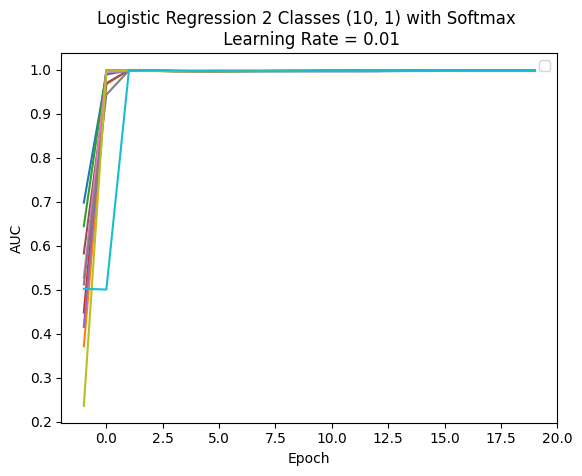


Test set: Avg. loss: 0.08655797539027871, AUC: 0.5167917827924121


Test set: Avg. loss: 0.010416749295895263, AUC: 0.9975186550391082


Test set: Avg. loss: 0.0025390119980976656, AUC: 0.9977973568281938


Test set: Avg. loss: 0.00382420725010811, AUC: 0.9964757709251102


Test set: Avg. loss: 0.004030717912858823, AUC: 0.9960352422907489


Test set: Avg. loss: 0.004974284070603391, AUC: 0.9960352422907489


Test set: Avg. loss: 0.005214184452174121, AUC: 0.9960352422907489


Test set: Avg. loss: 0.005299438765144799, AUC: 0.9960352422907489


Test set: Avg. loss: 0.004168635451765489, AUC: 0.9964757709251102


Test set: Avg. loss: 0.004311011249010162, AUC: 0.9964757709251102


Test set: Avg. loss: 0.0041372100794005336, AUC: 0.9964757709251102


Test set: Avg. loss: 0.003926136364046282, AUC: 0.9964757709251102


Test set: Avg. loss: 0.0035740055372810815, AUC: 0.9969162995594714


Test set: Avg. loss: 0.003933632852901522, AUC: 0.9964757709251102


Test set: Avg. loss: 0.003904732


Test set: Avg. loss: 0.0025647430555194826, AUC: 0.9964757709251102


Test set: Avg. loss: 0.0026540184697360857, AUC: 0.9969162995594714


Test set: Avg. loss: 0.0026540184697360857, AUC: 0.9969162995594714


Test set: Avg. loss: 0.0026540184697360857, AUC: 0.9969162995594714


Test set: Avg. loss: 0.0026540184697360857, AUC: 0.9969162995594714


Test set: Avg. loss: 0.0026540184697360857, AUC: 0.9969162995594714


Test set: Avg. loss: 0.0026540184697360857, AUC: 0.9969162995594714


Test set: Avg. loss: 0.06483490134525524, AUC: 0.19767149150409064


Test set: Avg. loss: 0.011855361816730905, AUC: 0.9979591836734694


Test set: Avg. loss: 0.002481639131586602, AUC: 0.9977973568281938


Test set: Avg. loss: 0.003133424264037581, AUC: 0.9964757709251102


Test set: Avg. loss: 0.004040039008390819, AUC: 0.9960352422907489


Test set: Avg. loss: 0.004616153212021992, AUC: 0.9960352422907489


Test set: Avg. loss: 0.005561027571946453, AUC: 0.9960352422907489


Test set: Avg. loss: 0.004

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.0012795943458593201, AUC: 0.9955947136563876


Test set: Avg. loss: 0.0012795943458593201, AUC: 0.9955947136563876


Test set: Avg. loss: 0.0012795943458593201, AUC: 0.9955947136563876



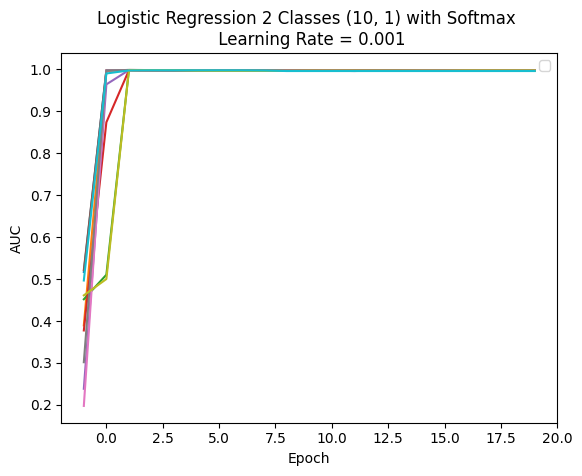


Test set: Avg. loss: 0.038096771059870436, AUC: 0.4992065989391351


Test set: Avg. loss: 0.04211903204590998, AUC: 0.5663265306122449


Test set: Avg. loss: 0.00011459692396734342, AUC: 0.9980985345680122


Test set: Avg. loss: 0.00023360866723014107, AUC: 0.9973568281938325


Test set: Avg. loss: 0.00022912054514208585, AUC: 0.9973568281938325


Test set: Avg. loss: 0.00023667294681776782, AUC: 0.9973568281938325


Test set: Avg. loss: 0.0002947783216517022, AUC: 0.9964757709251102


Test set: Avg. loss: 0.00029372212875537556, AUC: 0.9964757709251102


Test set: Avg. loss: 0.000302901547005836, AUC: 0.9969162995594714


Test set: Avg. loss: 0.0003251721813887287, AUC: 0.9969162995594714


Test set: Avg. loss: 0.0003255429560974698, AUC: 0.9969162995594714


Test set: Avg. loss: 0.0003410429819255856, AUC: 0.9969162995594714


Test set: Avg. loss: 0.0003671531277063609, AUC: 0.9969162995594714


Test set: Avg. loss: 0.0003374009549476858, AUC: 0.9969162995594714


Test set: Avg. los


Test set: Avg. loss: 0.00026466091192078645, AUC: 0.9960352422907489


Test set: Avg. loss: 0.00026041477848170216, AUC: 0.9960352422907489


Test set: Avg. loss: 0.0002633046667062926, AUC: 0.9960352422907489


Test set: Avg. loss: 0.000262476415780701, AUC: 0.9960352422907489


Test set: Avg. loss: 0.00026193012441585534, AUC: 0.9960352422907489


Test set: Avg. loss: 0.0002615100737159134, AUC: 0.9960352422907489


Test set: Avg. loss: 0.00026116679041661835, AUC: 0.9960352422907489


Test set: Avg. loss: 0.0002608755167494429, AUC: 0.9960352422907489


Test set: Avg. loss: 0.024157223802931765, AUC: 0.6520812730378495


Test set: Avg. loss: 0.012047761664604747, AUC: 0.9571428571428571


Test set: Avg. loss: 0.00024671146632931754, AUC: 0.9981682100152836


Test set: Avg. loss: 0.00018715962732373682, AUC: 0.9977276813809224


Test set: Avg. loss: 0.0001829493021528241, AUC: 0.9977973568281938


Test set: Avg. loss: 0.00025549929404089636, AUC: 0.9969162995594714


Test set: Avg. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.00022564415531519175, AUC: 0.9969162995594714



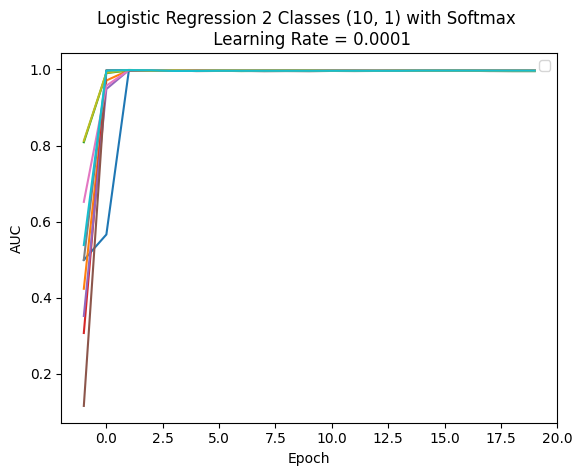


Test set: Avg. loss: 0.008355770156174969, AUC: 0.7850961970691359


Test set: Avg. loss: 0.00030128933647845653, AUC: 0.9889620605951631


Test set: Avg. loss: 0.00025701656514871206, AUC: 0.992742515508406


Test set: Avg. loss: 0.00024537132881211895, AUC: 0.9932527195900385


Test set: Avg. loss: 0.00024568947741044044, AUC: 0.9928121909556774


Test set: Avg. loss: 0.00023548949606734247, AUC: 0.9942731277533039


Test set: Avg. loss: 0.00022988592144586233, AUC: 0.9942731277533039


Test set: Avg. loss: 0.0002246490659865927, AUC: 0.9942731277533039


Test set: Avg. loss: 0.00020877931786626226, AUC: 0.9947136563876652


Test set: Avg. loss: 0.00019574095561096432, AUC: 0.9951541850220265


Test set: Avg. loss: 0.00018980963233787893, AUC: 0.9960352422907489


Test set: Avg. loss: 0.00018588722844214024, AUC: 0.9960352422907489


Test set: Avg. loss: 0.00018178713730873262, AUC: 0.9960352422907489


Test set: Avg. loss: 0.00017685837835628302, AUC: 0.9960352422907489


Test set:


Test set: Avg. loss: 0.0002954843196463078, AUC: 0.9936932482243999


Test set: Avg. loss: 0.00029502578660951437, AUC: 0.9936932482243999


Test set: Avg. loss: 0.0002971455630963012, AUC: 0.9936932482243999


Test set: Avg. loss: 0.00029922556088044004, AUC: 0.9936932482243999


Test set: Avg. loss: 0.0003013674953586948, AUC: 0.9932527195900385


Test set: Avg. loss: 0.0003035447417139725, AUC: 0.9923716623213162


Test set: Avg. loss: 0.00030575100129941397, AUC: 0.9923716623213162


Test set: Avg. loss: 0.0003079746561411143, AUC: 0.9923716623213162


Test set: Avg. loss: 0.026065242036860038, AUC: 0.47673963858671226


Test set: Avg. loss: 0.005327745194130756, AUC: 0.8877551020408163


Test set: Avg. loss: 0.000281294897621405, AUC: 0.9940641014114897


Test set: Avg. loss: 0.0002467080475168025, AUC: 0.9936932482243999


Test set: Avg. loss: 0.000230072909001763, AUC: 0.9932527195900385


Test set: Avg. loss: 0.00022147057256518245, AUC: 0.9914906050525937


Test set: Avg. los

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.0004375149559749215, AUC: 0.992742515508406



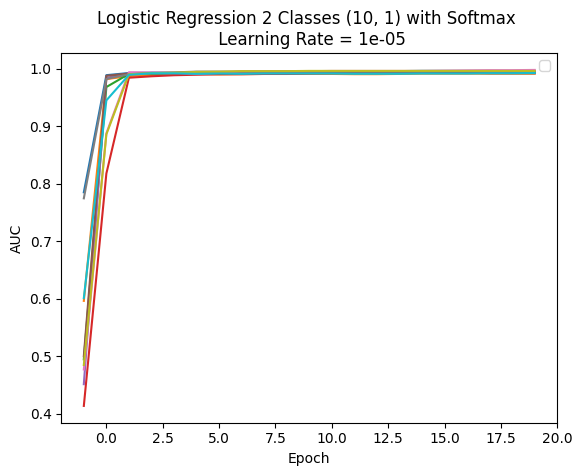


Test set: Avg. loss: 0.039887144661400614, AUC: 0.40801941922143303


Test set: Avg. loss: 0.013322922185803136, AUC: 0.6290389283466692


Test set: Avg. loss: 0.004563079319947155, AUC: 0.8332644070844197


Test set: Avg. loss: 0.002853487597571479, AUC: 0.8889598130000901


Test set: Avg. loss: 0.002125764174946093, AUC: 0.9223253618628068


Test set: Avg. loss: 0.0017168789186094388, AUC: 0.9402252090263419


Test set: Avg. loss: 0.0014570991620949819, AUC: 0.9506360694057359


Test set: Avg. loss: 0.0012777594387108552, AUC: 0.9595859929875034


Test set: Avg. loss: 0.0011621266039832546, AUC: 0.9668434774790973


Test set: Avg. loss: 0.0010848987046144815, AUC: 0.9686055920165423


Test set: Avg. loss: 0.0010193686536017885, AUC: 0.9703677065539873


Test set: Avg. loss: 0.0009630584054523045, AUC: 0.9721994965387035


Test set: Avg. loss: 0.0009152607855785541, AUC: 0.9749123437921425


Test set: Avg. loss: 0.0008732300982689463, AUC: 0.9771149869639485


Test set: Avg. loss: 0.


Test set: Avg. loss: 0.0005302608013153076, AUC: 0.9857637328058977


Test set: Avg. loss: 0.0005219818147925338, AUC: 0.986204261440259


Test set: Avg. loss: 0.00051359716036641, AUC: 0.986204261440259


Test set: Avg. loss: 0.0005048810731152835, AUC: 0.9870853187089812


Test set: Avg. loss: 0.0004959688400827683, AUC: 0.9870853187089812


Test set: Avg. loss: 0.0004870326524648824, AUC: 0.9875955227906139


Test set: Avg. loss: 0.000478101114854745, AUC: 0.9880360514249752


Test set: Avg. loss: 0.08022614787938183, AUC: 0.39155803290479185


Test set: Avg. loss: 0.04685223897298177, AUC: 0.49043648296322934


Test set: Avg. loss: 0.018600058048329454, AUC: 0.7116313045041804


Test set: Avg. loss: 0.006821477497723085, AUC: 0.8333363301267643


Test set: Avg. loss: 0.0032649812968910162, AUC: 0.9033129551380024


Test set: Avg. loss: 0.002059421640761355, AUC: 0.9324350445023825


Test set: Avg. loss: 0.0015471352189427008, AUC: 0.9492223321046481


Test set: Avg. loss: 0.001264

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.0007128235155245372, AUC: 0.9835610896340915


Test set: Avg. loss: 0.0007034979954397142, AUC: 0.984442146902814



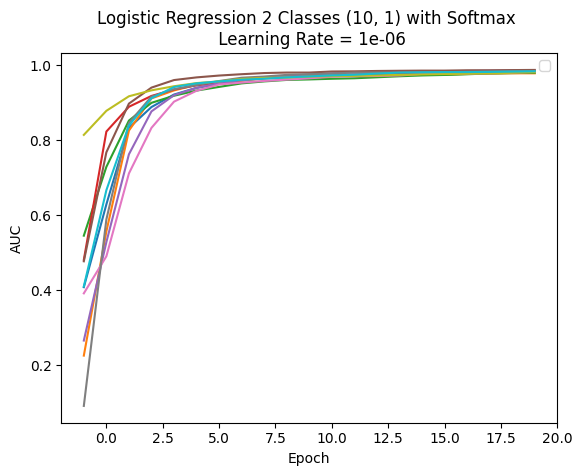


Test set: Avg. loss: 0.06803412290893267, AUC: 0.19865818574125688


Test set: Avg. loss: 0.036184425444185875, AUC: 0.40863526027150954


Test set: Avg. loss: 0.03439807486026845, AUC: 0.4857008001438461


Test set: Avg. loss: 0.032263359448588484, AUC: 0.5122763642902095


Test set: Avg. loss: 0.0297918666902727, AUC: 0.5322417513260811


Test set: Avg. loss: 0.027179361347892887, AUC: 0.5489368875303426


Test set: Avg. loss: 0.024533320487813745, AUC: 0.5640317360424346


Test set: Avg. loss: 0.021950025085016346, AUC: 0.5811898768317899


Test set: Avg. loss: 0.019489248199102163, AUC: 0.6075991189427312


Test set: Avg. loss: 0.017216268047936984, AUC: 0.6355614492493032


Test set: Avg. loss: 0.015180376291838662, AUC: 0.6586082891306302


Test set: Avg. loss: 0.013378496598408295, AUC: 0.6793131349456082


Test set: Avg. loss: 0.011797640509639227, AUC: 0.7072057898049089


Test set: Avg. loss: 0.010446976149899458, AUC: 0.7276094578800683


Test set: Avg. loss: 0.009259151454


Test set: Avg. loss: 0.005326963992829018, AUC: 0.8385777218376337


Test set: Avg. loss: 0.00505093491105605, AUC: 0.8465072372561359


Test set: Avg. loss: 0.004798634283367905, AUC: 0.853625370853187


Test set: Avg. loss: 0.0045668344971136, AUC: 0.8590510653600647


Test set: Avg. loss: 0.0043537349565654785, AUC: 0.8652881416883935


Test set: Avg. loss: 0.0041577854336858075, AUC: 0.8706441607479998


Test set: Avg. loss: 0.003976693615563936, AUC: 0.8743077407174324


Test set: Avg. loss: 0.018225632435322936, AUC: 0.5567832419311337


Test set: Avg. loss: 0.017561103604364057, AUC: 0.5844286613323745


Test set: Avg. loss: 0.016530607778129848, AUC: 0.6076418232491234


Test set: Avg. loss: 0.015378336534432486, AUC: 0.6234559021846624


Test set: Avg. loss: 0.014186771654349974, AUC: 0.6411017711049177


Test set: Avg. loss: 0.013025843392590823, AUC: 0.6587004405286343


Test set: Avg. loss: 0.011900292840691605, AUC: 0.6744673199676346


Test set: Avg. loss: 0.010842405594

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.0012244442957794694, AUC: 0.9327834217387396



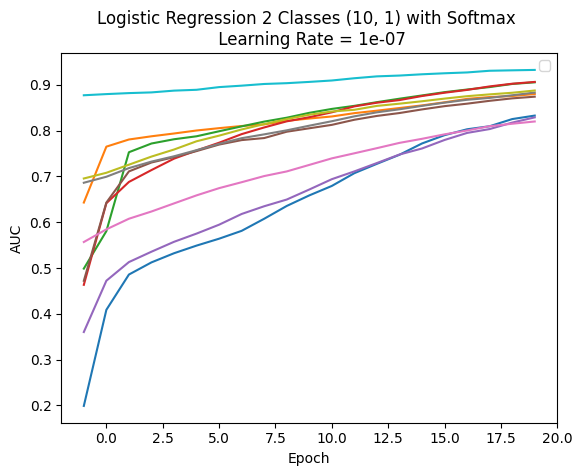

In [49]:
# SOFTMAX 2 CLASS RATIO 

learning_rates = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 1e-7]

for learning_rate in learning_rates:
    aucs = []
    for i in range(10):
        model_aucs = []
        network = models.SoftmaxLogisticRegression(NUM_CLASSES_REDUCED)
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        _, auc = metric_utils.auc_softmax(test_loader_reduced, network) 
        model_aucs.append(auc)
        for epoch in range(n_epochs):
            directory = f"{DIRECTORY}/softmax/{str(learning_rate)}/ratio{i}_{RATIO_STR}/model{epoch}"
            _, _ = train.train_softmax(epoch, train_loader_reduced_ratio, network, optimizer, verbose=False, directory=directory)
            _, auc = metric_utils.auc_softmax(test_loader_reduced, network)
            model_aucs.append(auc)
        aucs.append(model_aucs)
        plt.plot(np.arange(-1, n_epochs), aucs[i])
    np.save(f'{DIRECTORY}/softmax/{str(learning_rate)}/ratio{i}_{RATIO_STR}/aucs', aucs)
    plt.title("Logistic Regression 2 Classes " + str(ratio) + " with Softmax \n Learning Rate = " + str(learning_rate))
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()
  


Test set: Avg. loss: 0.02398636523734462, AUC: 0.5576181126834224


Test set: Avg. loss: 1523661043062033.5, AUC: 0.9749649552241365


Test set: Avg. loss: 1276953639874789.0, AUC: 0.9812537241772517


Test set: Avg. loss: 914152381449481.0, AUC: 0.9896216021571292


Test set: Avg. loss: 1053141844792152.5, AUC: 0.9854290895217191


Test set: Avg. loss: 757093466048499.2, AUC: 0.9917092848293629


Test set: Avg. loss: 1399882077460204.5, AUC: 0.9733991932199612


Test set: Avg. loss: 926422453878309.1, AUC: 0.985420515876248


Test set: Avg. loss: 810059945323585.8, AUC: 0.9864815045033072


Test set: Avg. loss: 741181439198099.9, AUC: 0.9896130285116579


Test set: Avg. loss: 871672807332276.8, AUC: 0.9875081985484817


Test set: Avg. loss: 1443501213997526.8, AUC: 0.9775659849189576


Test set: Avg. loss: 697648006376717.2, AUC: 0.9891254024254842


Test set: Avg. loss: 705136935439273.1, AUC: 0.9891339760709554


Test set: Avg. loss: 1035754056508121.2, AUC: 0.9828023388904846


Te


Test set: Avg. loss: 871548137681158.9, AUC: 0.986472930857836


Test set: Avg. loss: 785939622403773.8, AUC: 0.9906482962023038


Test set: Avg. loss: 0.018672671624098754, AUC: 0.45835298127087143


Test set: Avg. loss: 4069895430429346.0, AUC: 0.958263493846266


Test set: Avg. loss: 1221801706950969.8, AUC: 0.986472930857836


Test set: Avg. loss: 1310768530962953.5, AUC: 0.9843852481856022


Test set: Avg. loss: 918819259122681.6, AUC: 0.9885691871755411


Test set: Avg. loss: 916302906254448.4, AUC: 0.9875253458394242


Test set: Avg. loss: 777178138103545.1, AUC: 0.9896130285116579


Test set: Avg. loss: 950113511267588.8, AUC: 0.9859510101897776


Test set: Avg. loss: 884080532129100.9, AUC: 0.9870034251713657


Test set: Avg. loss: 876967835087857.1, AUC: 0.9885691871755411


Test set: Avg. loss: 778080259081141.8, AUC: 0.9901349491797163


Test set: Avg. loss: 746569640177960.8, AUC: 0.9912302323886606


Test set: Avg. loss: 871264758762341.2, AUC: 0.9886634972757243


Test 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 783913553835400.2, AUC: 0.9912216587431893


Test set: Avg. loss: 825053062587165.1, AUC: 0.9875081985484817



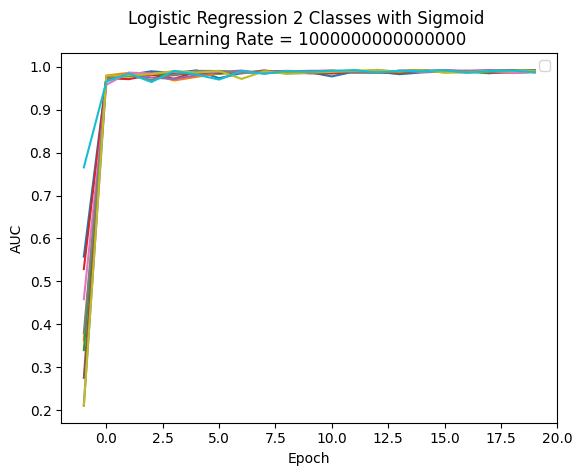

In [89]:
# SIGMOID 2 CLASS 

learning_rates = [1000000000000000]

momentum=0

for learning_rate in learning_rates:
    aucs = []
    for i in range(10):
        model_aucs = []
        network = models.SigmoidLogisticRegression(NUM_CLASSES_REDUCED)
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network) 
        model_aucs.append(auc)
        for epoch in range(n_epochs):
            directory = f"{DIRECTORY}/sigmoid/{str(learning_rate)}/reduced{i}/model{epoch}"
            directory = None
            _, _ = train.train_sigmoid(epoch, train_loader_reduced,  network, optimizer, verbose=False, directory=directory)
            _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network)
            model_aucs.append(auc)
        aucs.append(model_aucs)
        plt.plot(np.arange(-1, n_epochs), aucs[i])
 #   np.save(f'{DIRECTORY}/sigmoid/{str(learning_rate)}/reduced{i}/aucs', aucs)
    plt.title("Logistic Regression 2 Classes with Sigmoid \n Learning Rate = " + str(learning_rate))
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()


Test set: Avg. loss: 0.022266241827860134, AUC: 0.4862714501892632


Test set: Avg. loss: 796751.2712215321, AUC: 0.9733991932199612


Test set: Avg. loss: 510145.36645962734, AUC: 0.9807146562182507


Test set: Avg. loss: 395744.9026915114, AUC: 0.9833242595585431


Test set: Avg. loss: 305426.81573498965, AUC: 0.9890825341981283


Test set: Avg. loss: 289180.066252588, AUC: 0.9906997380751308


Test set: Avg. loss: 605963.486542443, AUC: 0.9681799865393766


Test set: Avg. loss: 512432.91097308486, AUC: 0.9728686989064315


Test set: Avg. loss: 292182.3519668737, AUC: 0.9885691871755411


Test set: Avg. loss: 501200.9689440994, AUC: 0.9801755882592498


Test set: Avg. loss: 259633.37474120082, AUC: 0.9917007111838917


Test set: Avg. loss: 270037.7308488613, AUC: 0.989065386907186


Test set: Avg. loss: 245634.9440993789, AUC: 0.9901349491797163


Test set: Avg. loss: 590505.2422360248, AUC: 0.9728686989064315


Test set: Avg. loss: 292721.5734989648, AUC: 0.9896901913208986


Test 


Test set: Avg. loss: 237124.69565217392, AUC: 0.9896130285116579


Test set: Avg. loss: 0.027890685182180464, AUC: 0.5683244524655662


Test set: Avg. loss: 850067.8592132506, AUC: 0.9624302855452624


Test set: Avg. loss: 434500.22360248445, AUC: 0.9765392908737832


Test set: Avg. loss: 907930.1366459627, AUC: 0.9509480308479764


Test set: Avg. loss: 281249.34161490685, AUC: 0.9849071688536607


Test set: Avg. loss: 258795.32919254657, AUC: 0.9906568698477748


Test set: Avg. loss: 261479.03933747413, AUC: 0.9885691871755411


Test set: Avg. loss: 867706.4347826086, AUC: 0.9582549202007947


Test set: Avg. loss: 366002.95652173914, AUC: 0.9859424365443065


Test set: Avg. loss: 276956.5962732919, AUC: 0.9917264321203053


Test set: Avg. loss: 314113.13457556936, AUC: 0.9864557835668938


Test set: Avg. loss: 216288.16563146998, AUC: 0.9896216021571292


Test set: Avg. loss: 289169.66045548656, AUC: 0.9880472665074826


Test set: Avg. loss: 292757.73913043475, AUC: 0.988141576607665

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 260165.06832298136, AUC: 0.990665443493246



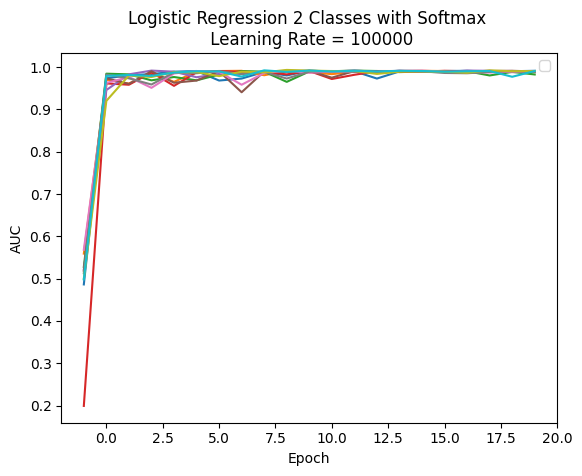

In [72]:
# SOFTMAX 2 CLASS  

learning_rates = []

for learning_rate in learning_rates:
    aucs = []
    for i in range(10):
        model_aucs = []
        network = models.SoftmaxLogisticRegression(NUM_CLASSES_REDUCED)
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        _, auc = metric_utils.auc_softmax(test_loader_reduced, network) 
        model_aucs.append(auc)
        for epoch in range(n_epochs):
          #  directory = f"{DIRECTORY}/softmax/{str(learning_rate)}/reduced{i}/model{epoch}"
            directory=None
            _, _ = train.train_softmax(epoch, train_loader_reduced, network, optimizer, verbose=False, directory=directory)
            _, auc = metric_utils.auc_softmax(test_loader_reduced, network)
            model_aucs.append(auc)
        aucs.append(model_aucs)
        plt.plot(np.arange(-1, n_epochs), aucs[i])
   # np.save(f'{DIRECTORY}/softmax/{str(learning_rate)}/reduced{i}/aucs', aucs)
    plt.title("Logistic Regression 2 Classes with Softmax \n Learning Rate = " + str(learning_rate))
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()